# Project: Data Transformation in  Python

### 1. Import the neccessary libraries for this task:

In [7]:
import pandas as pd

### 2. Reading in all files using "pd.read_csv"

In [8]:
event_type = pd.read_csv("event_type.csv")
log_feature = pd.read_csv("log_feature.csv")
resource_type = pd.read_csv("resource_type.csv")
severity_type = pd.read_csv("severity_type.csv")
train = pd.read_csv("train.csv")

### 3. Checking for the data type of each of the files using ".dtypes": 

In [9]:
print("event_type data type:", event_type.dtypes)
print("log_feature data type:", log_feature.dtypes)
print("resource_type data type:", resource_type.dtypes)
print("severity_type data type:", severity_type.dtypes)
print("train data type:", train.dtypes)

event_type data type: id             int64
event_type    object
dtype: object
log_feature data type: id              int64
log_feature    object
volume          int64
dtype: object
resource_type data type: id                int64
resource_type    object
dtype: object
severity_type data type: id                int64
severity_type    object
dtype: object
train data type: id                 int64
location          object
fault_severity     int64
dtype: object


### `4. Merge all files together.

In [10]:
Train_file1 = pd.merge(train, severity_type, how = 'left', on='id')
Train_file2 = pd.merge(Train_file1, resource_type, how = 'left', on='id')
Train_file3 = pd.merge(Train_file2, log_feature, how = 'left', on='id')
Train_file = pd.merge(Train_file3, event_type, how = 'left', on='id')
Train_file

,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 35
2,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 34
3,14121,location 118,1,severity_type 2,resource_type 2,feature 232,19,event_type 35
4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
...,...,...,...,...,...,...,...,...
61834,15189,location 7,0,severity_type 1,resource_type 8,feature 55,10,event_type 11
61835,15189,location 7,0,severity_type 1,resource_type 8,feature 70,1,event_type 11
61836,17067,location 885,0,severity_type 1,resource_type 8,feature 81,1,event_type 11
61837,17067,location 885,0,severity_type 1,resource_type 8,feature 191,1,event_type 11


In [19]:
#dropping the duplicate records
Train_file.drop_duplicates(subset= 'id', keep= 'first', inplace = True)
### Resetting index
Train_file.reset_index(inplace = True)
Train_file

,index,id,location,fault_severity,severity_type,resource_type,log_feature,volume,event_type
0,0,14121,location 118,1,severity_type 2,resource_type 2,feature 312,19,event_type 34
1,4,9320,location 91,0,severity_type 2,resource_type 2,feature 315,200,event_type 34
2,8,14394,location 152,1,severity_type 2,resource_type 2,feature 221,1,event_type 35
3,12,8218,location 931,1,severity_type 1,resource_type 8,feature 80,9,event_type 15
4,18,14804,location 120,0,severity_type 1,resource_type 2,feature 134,1,event_type 34
...,...,...,...,...,...,...,...,...,...
7376,61824,870,location 167,0,severity_type 2,resource_type 2,feature 232,1,event_type 34
7377,61828,18068,location 106,0,severity_type 1,resource_type 2,feature 219,1,event_type 20
7378,61830,14111,location 1086,2,severity_type 2,resource_type 8,feature 82,21,event_type 15
7379,61832,15189,location 7,0,severity_type 1,resource_type 8,feature 191,3,event_type 11


### Visualizations

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lordjames\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


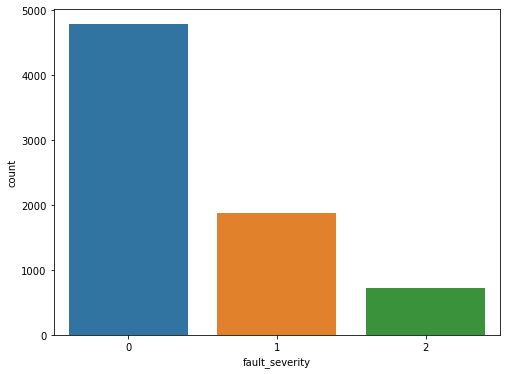

In [17]:
#count plot for fault severity
plt.figure(figsize = (8,6))
sns.countplot(Train_file['fault_severity'])
plt.show()


C:\Users\Lordjames\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


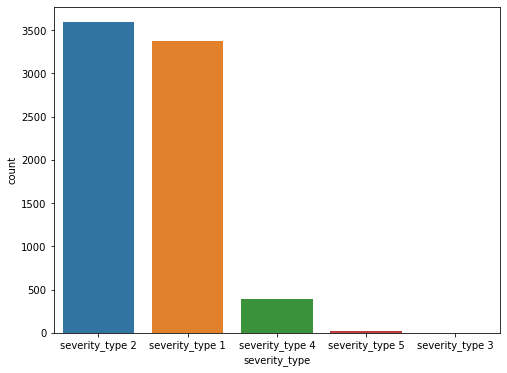

In [18]:
#count plot for severity type
plt.figure(figsize = (8,6))
sns.countplot(Train_file['severity_type'])
plt.show()